# Apply scVelo on real data and save the results for comparison with BayVel
In this notebook we will apply *scVelo* to the pre-processed dataset and we will save the results of the estimation, such that we can compare them with *BayVel* estimation.

Load the packages.

In [1]:
import scanpy
import scvelo as scv
import numpy as np
import scipy.sparse
import pandas as pd 
import copy 
scv.logging.print_version()

AttributeError: module 'matplotlib.cbook' has no attribute 'mplDeprecation'

In [7]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Set on which dataset ("Pancreas" or "DentateGyrus") we want to apply *scVelo* and set the path where the results will be saved.

In [8]:
typeSIM = "Pancreas"
pathOutput = "pathOutput"

Load the data.

In [9]:
if typeSIM == "Pancreas":
    adata = scv.datasets.pancreas()
elif typeSIM == "DentateGyrus":
    adata = scv.datasets.dentategyrus()

Pre-process the data.

In [10]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
C:\Users\elena\AppData\Local\Temp\ipykernel_8932\3334712381.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\preprocessing\moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:30) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


Estimate the dynamic using *scVelo*, following the notebook "https://github.com/theislab/scvelo_notebooks/blob/master/Pancreas.ipynb".

In [11]:
scv.tl.velocity(adata)

computing velocities


c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [12]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:26) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Progr

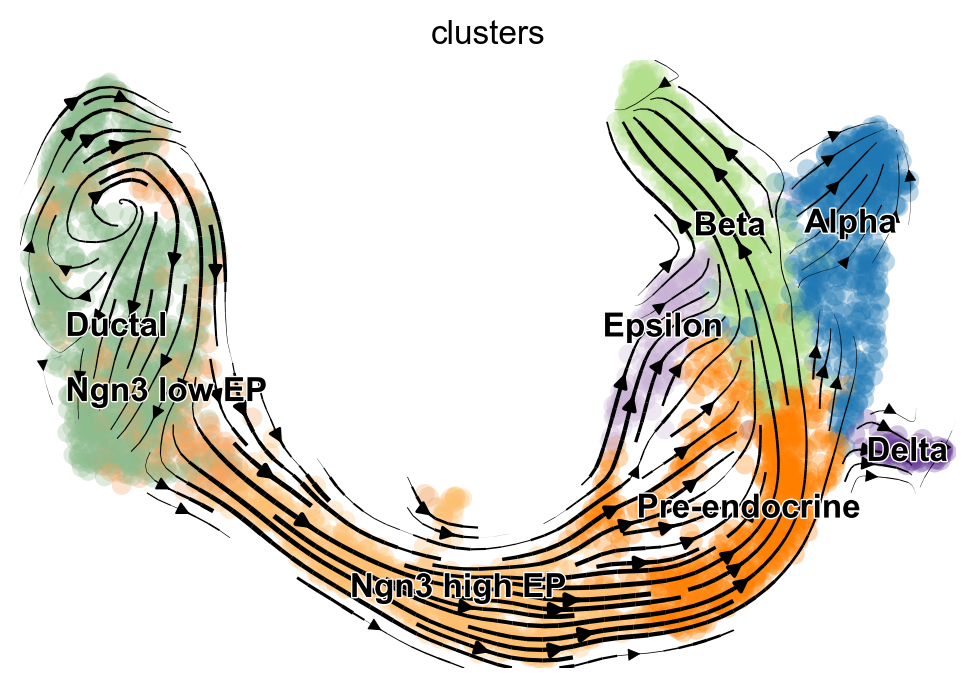

In [13]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\elena\AppData\Local\Progr

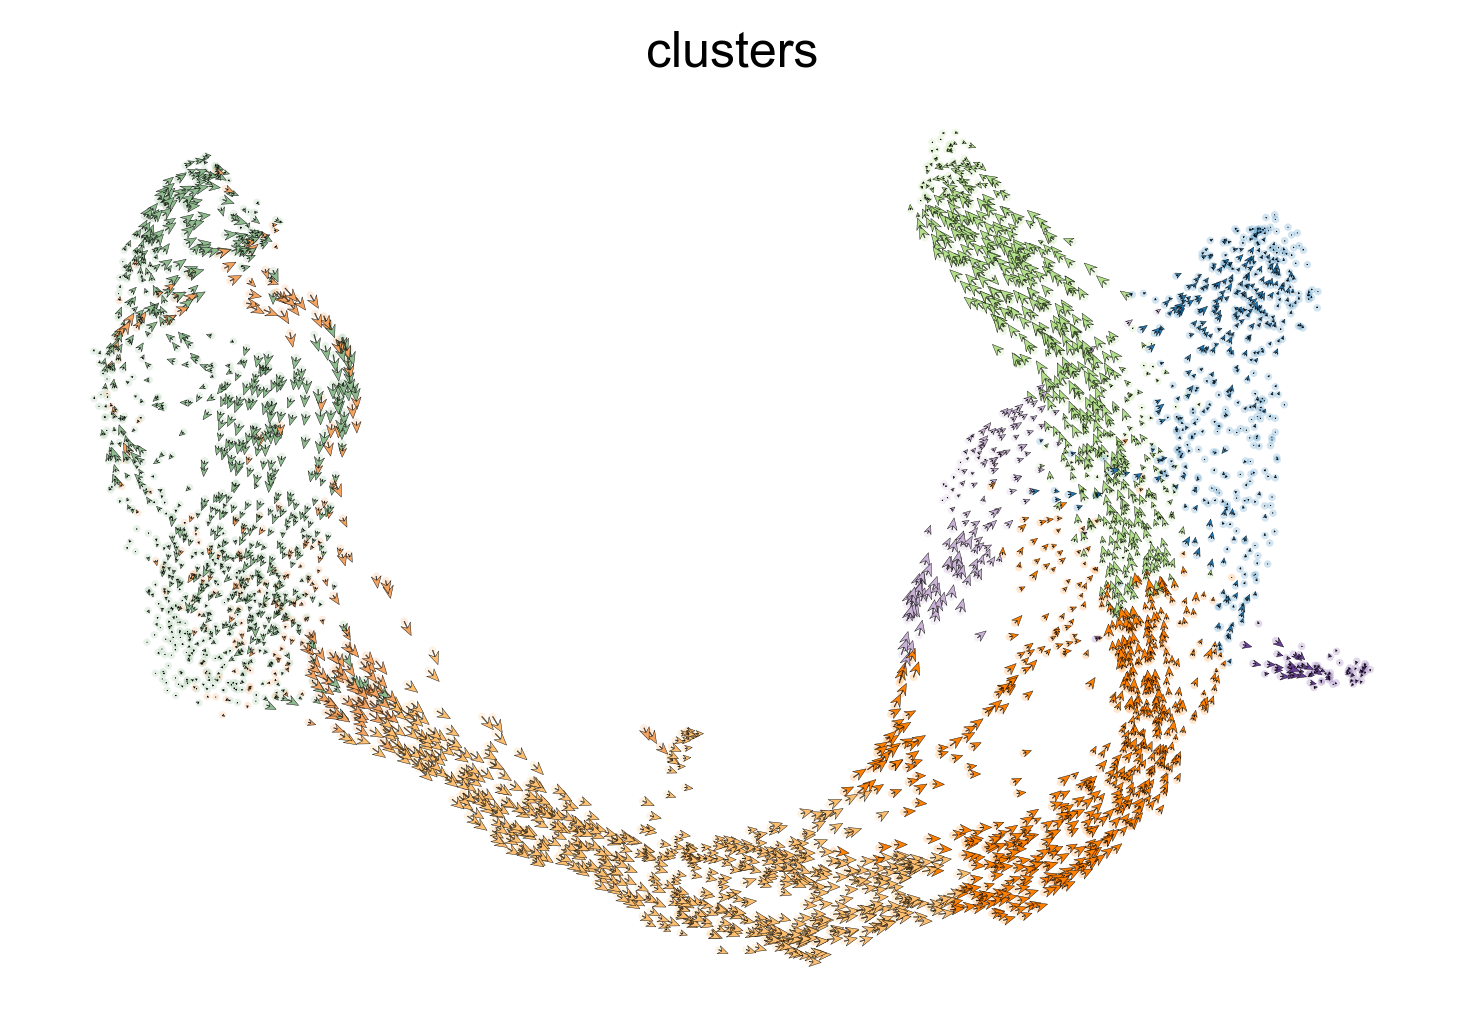

In [14]:
scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=1.5, dpi=150)

In [15]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/8 cores)


KeyboardInterrupt: 

In [ ]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

In [ ]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True)

Save the results.

In [ ]:
pathToSave = pathOutput + "/" + typeSIM + "/moments/output/res_" + typeSIM + "_"


In [ ]:
adata.write(pathToSave + ".h5ad")
adata.write_csvs(pathToSave + ".csv", skip_data=False)

top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
top_genes = pd.DataFrame(data=top_genes)
top_genes.to_csv(pathToSave + 'top_genes.csv', index=False)

# data
unspliced = pd.DataFrame(data=scipy.sparse.csr_matrix.todense(adata.layers["unspliced"]))
unspliced.to_csv(pathToSave + 'unspliced.csv', index=False)
spliced = pd.DataFrame(data=scipy.sparse.csr_matrix.todense(adata.layers["spliced"]))
spliced.to_csv(pathToSave + 'spliced.csv', index=False)
Mu = pd.DataFrame(np.asmatrix(adata.layers["Mu"]))
Mu.to_csv(pathToSave + 'Mu.csv', index=False)
Ms = pd.DataFrame(np.asmatrix(adata.layers["Ms"]))
Ms.to_csv(pathToSave + 'Ms.csv', index=False)


# transcription, splicing and degradation rate and steady states
alpha = pd.DataFrame(np.asmatrix(adata.var["fit_alpha"])) 
alpha.to_csv(pathToSave + 'fit_alpha.csv', index=False)
beta = pd.DataFrame(np.asmatrix(adata.var["fit_beta"]))
beta.to_csv(pathToSave + 'fit_beta.csv', index=False)
gamma = pd.DataFrame(np.asmatrix(adata.var["fit_gamma"]))
gamma.to_csv(pathToSave + 'fit_gamma.csv', index=False)
fit_steady_u = pd.DataFrame(np.asmatrix(adata.var["fit_steady_u"]))
fit_steady_u.to_csv(pathToSave + 'fit_steady_u.csv', index=False)
fit_steady_s= pd.DataFrame(np.asmatrix(adata.var["fit_steady_s"]))
fit_steady_s.to_csv(pathToSave + 'fit_steady_s.csv', index=False)
fit_scaling = pd.DataFrame(np.asmatrix(adata.var["fit_scaling"]))
fit_scaling.to_csv(pathToSave + 'fit_scaling.csv', index=False)

# switching time
fit_u0 = pd.DataFrame(np.asmatrix(adata.var["fit_u0"]))
fit_u0.to_csv(pathToSave + 'fit_u0.csv', index=False)
fit_s0 = pd.DataFrame(np.asmatrix(adata.var["fit_s0"]))
fit_s0.to_csv(pathToSave + 'fit_s0.csv', index=False)
fit_t_ = pd.DataFrame(np.asmatrix(adata.var["fit_t_"]))
fit_t_.to_csv(pathToSave + 'fit_t_.csv', index=False)

# time
fit_t = pd.DataFrame(np.asmatrix(adata.layers["fit_t"]))
fit_t.to_csv(pathToSave + 'fit_t.csv', index=False)
fit_tau = pd.DataFrame(np.asmatrix(adata.layers["fit_tau"]))
fit_tau.to_csv(pathToSave + 'fit_tau.csv', index=False)
fit_tau_ = pd.DataFrame(np.asmatrix(adata.layers["fit_tau_"]))
fit_tau_.to_csv(pathToSave + 'fit_tau_.csv', index=False)
# velocity
velocity = pd.DataFrame(np.asmatrix(adata.layers["velocity"]))
velocity.to_csv(pathToSave + 'velocity.csv', index=False)
velocity_u = pd.DataFrame(np.asmatrix(adata.layers["velocity_u"]))
velocity_u.to_csv(pathToSave + 'velocity_u.csv', index=False)